# Correlation Analysis of House Sale Price and House Attributes

## Objectives

* Correlation Analysis of the house sale price in Ames and house features

## Inputs

* `house_prices_records.csv` data located at outputs/datasets/collection

## Imports and Setup

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.encoding import OneHotEncoder

---

# Change working directory

Ensure that you are on the correct directory. We will change the directory to the project level

In [29]:
cd "~/Documents/GitHub/heritage-housing-issues"

/Users/mehtap/Documents/GitHub/heritage-housing-issues


# Load Data

Load the `house_prices_records` data.

In [36]:
df = pd.read_csv('outputs/datasets/collection/house_prices_records.csv')
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Correlation of Numerical Variables with `SalePrice`

In [37]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()['SalePrice'].sort_values(key=abs, ascending=False)[1:]
print(corr)

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64


# Correlation Heatmap for Numerical Variables

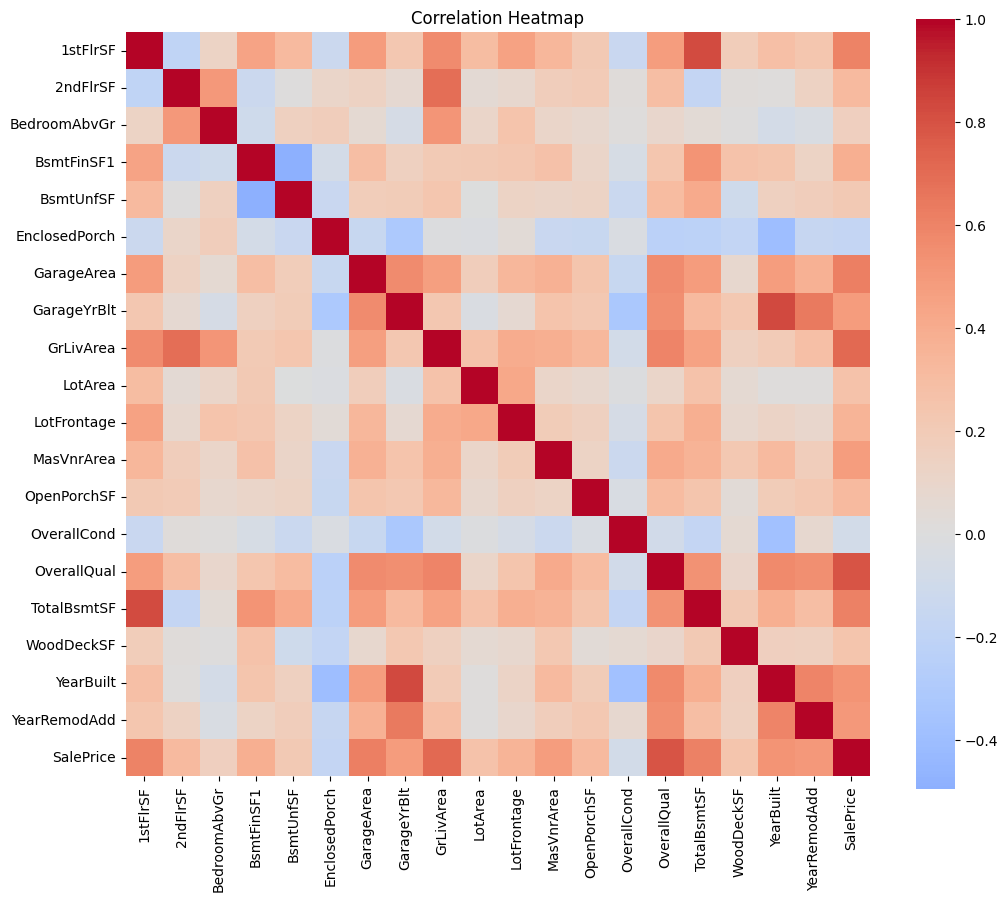

In [38]:
%matplotlib inline
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, square=True)
plt.title("Correlation Heatmap")
plt.show()

In the above correlation heatmap, 
* remove upper half of the triange (above diagonal squares) for a clearer depiction, 
* add 2-decimal point correlation values in squares for more information,
* add space between squares for a cleaner look.

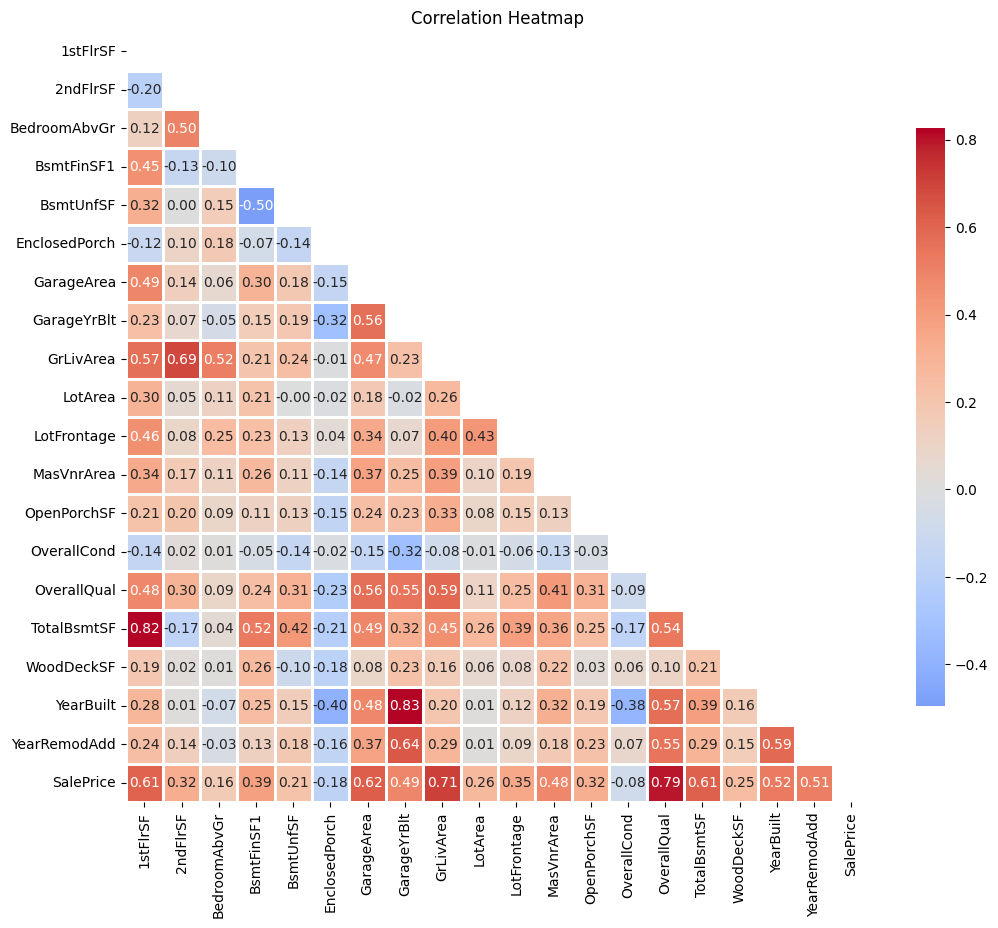

In [41]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt="0.2f", 
    mask=mask, linewidths=1, cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap")
plt.show()

# Visual Representation of Correlations

## Visualisation of the relationship between house price and overall quality rating of the house

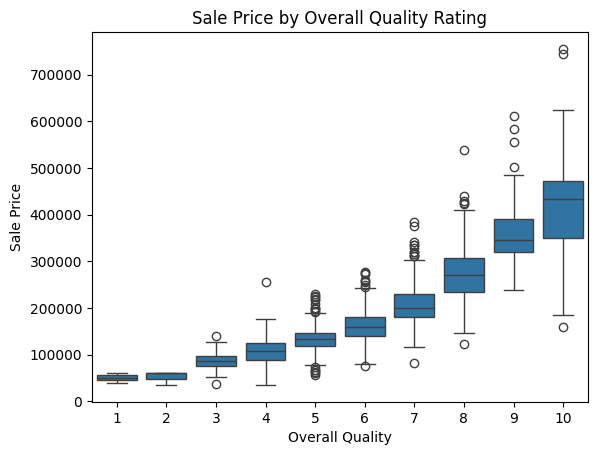

In [47]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="OverallQual", y="SalePrice", ax=ax)
ax.set_title("Sale Price by Overall Quality Rating")
ax.set_xlabel("Overall Quality")
ax.set_ylabel("Sale Price")
plt.show()

Sale prices increase markedly with increasing levels of overall quality rating. The increase appears to be exponential. As the overall quality increases, the median sale price changes at an increasing rate. We also observe higher variation in house prices at increasing levels of overall house quality. This may be an indication of heteroscedasticity in the data (something to be considered during modelling).

## Visualisation of the relationship between house price and size of above-ground living area

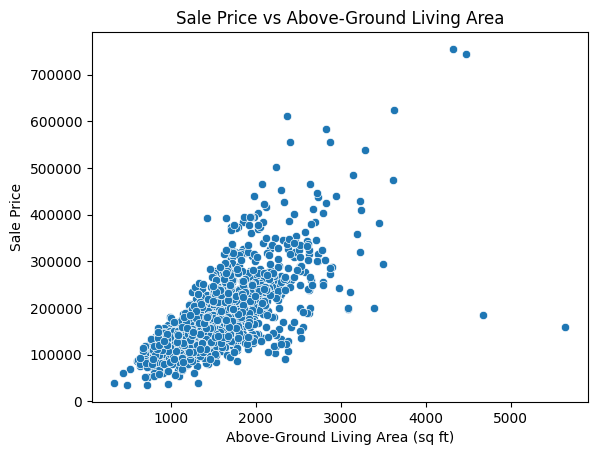

In [49]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=ax)
ax.set_title("Sale Price vs Above-Ground Living Area")
ax.set_xlabel("Above-Ground Living Area (sq ft)")
ax.set_ylabel("Sale Price")
plt.show()

Larger above-ground living area is associated with higher sale prices. This indicates that house size is a key determinant of value. Larger above-ground living areas show greater variability in price, an indicator of heteroscedasticity that should be considered during modeling.

## Visualisation of the relationship between house price and total basement size

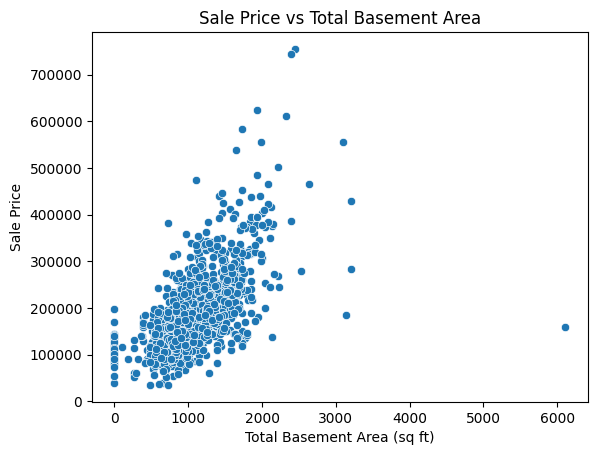

In [50]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=ax)
ax.set_title("Sale Price vs Total Basement Area")
ax.set_xlabel("Total Basement Area (sq ft)")
ax.set_ylabel("Sale Price")
plt.show()

Houses with larger basements tend to sell for more, indicating that basement space contributes positively to perceived value. The spread across sale prices suggests that in addition to size, basement quality and finish may also matter.

## Visualisation of the relationship between house price and garage size

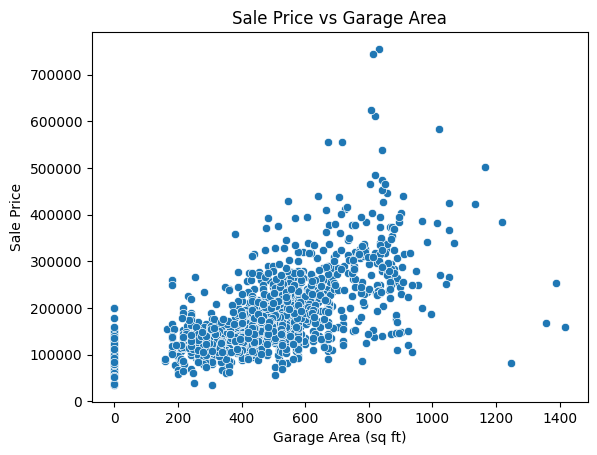

In [51]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", ax=ax)
ax.set_title("Sale Price vs Garage Area")
ax.set_xlabel("Garage Area (sq ft)")
ax.set_ylabel("Sale Price")
plt.show()

Larger garage areas are broadly associated with higher sale prices. This reflects the value buyers place on garage capacity in Ames.

## Visualisation of the relationship between house price and year of built

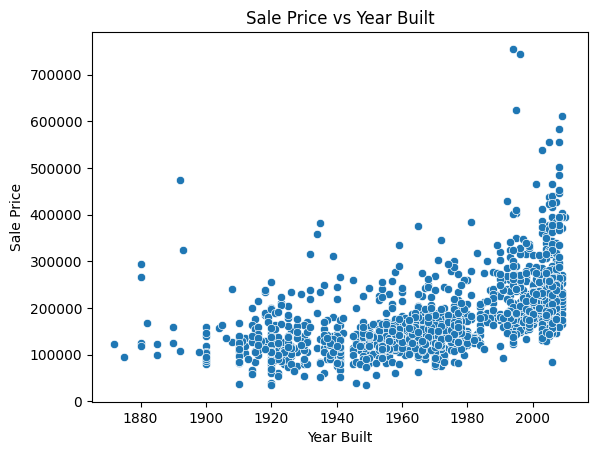

In [52]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice", ax=ax)
ax.set_title("Sale Price vs Year Built")
ax.set_xlabel("Year Built")
ax.set_ylabel("Sale Price")
plt.show()

Most recently built houses tend to have higher prices, suggesting a premium for modern construction. However, the spread of points indicates that other factors may also play important roles. The relationship is not as strong as with other features such as overall quality or size.

## Visualisation of the relationship between house price and kitchen quality

/var/folders/73/swtt7_2s50x1ntff25sb67nm0000gn/T/ipykernel_34491/3241769275.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([kitchen_labels[k] for k in kitchen_order])


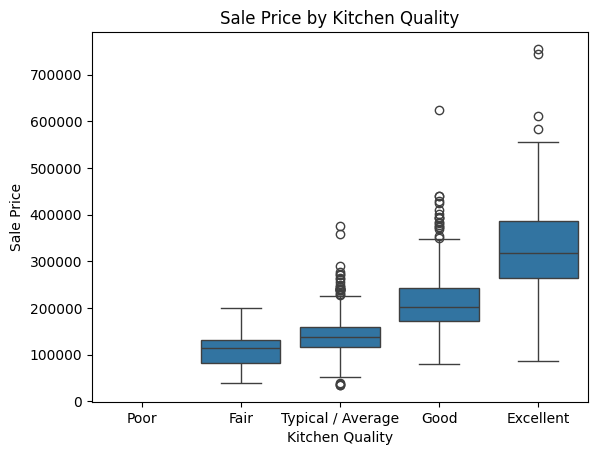

In [53]:
kitchen_order = ["Po", "Fa", "TA", "Gd", "Ex"]
kitchen_labels = {
    "Po": "Poor",
    "Fa": "Fair",
    "TA": "Typical / Average",
    "Gd": "Good",
    "Ex": "Excellent"
    }
                     
fig, ax = plt.subplots()
sns.boxplot(
data=df,
x="KitchenQual",
y="SalePrice",
order=kitchen_order,
ax=ax
)
ax.set_xticklabels([kitchen_labels[k] for k in kitchen_order])
ax.set_title("Sale Price by Kitchen Quality")
ax.set_xlabel("Kitchen Quality")
ax.set_ylabel("Sale Price")
plt.show()

Higher kitchen quality is associated with higher sale prices, highlighting the importance of kitchens as a visible quality signal to buyers. We observe higher price variation at mid to high kitchen quality levels.

# Conclusions

- The correlation coefficients and the visual insights help identify which attributes are most relevant when pricing the client's inherited properties.
- Sale price in Ames is strongly influenced by **house quality**, **living space**, and **key amenities** such as basements and garages.
- The same features will be prioritised as inputs to the machine-learning model used for sale price prediction.

# Next Steps

* Next steps will be to modify the data with appropriate transformations for a more symmetric distribution of numerical variables
* Impute missing values, where possbile
* Transform some variables approprite to the content. For example, instead of looking at the first and second floor squarefeet, these two may be summed to look at the total squarefeet, in particular when there is very high level of missingess for the latter. 